# Credit card Fraud Detection 

In [1]:
# Importing important liberaries
import warnings
warnings.filterwarnings("ignore")


In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
application_data= pd.read_csv("application_data.csv")
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
#check the shape of the dataset
application_data.shape

(307511, 122)

In [6]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
# checking null values in the dataset
(application_data.isnull().sum())

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
#lets us check if the columns with more than or equal to 40% of null values
null_percentage_in_data = (application_data.isnull().sum())/len(application_data)*100
missing_dataset = null_percentage_in_data[null_percentage_in_data>40]
missing_dataset

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

__These are the columns which have more then 40 percent of values are null__
- So we have to drop this columns, They are of no use

In [10]:
application_data.drop(missing_dataset.index,axis=1,inplace=True) 

In [11]:
application_data.shape

(307511, 73)

__we left with now 73 columns__

In [12]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


__Lets check the columns with <=20% and >0% of null values__

In [13]:
null_percentage_in_data[(null_percentage_in_data<=20)&(null_percentage_in_data>0)].sort_values(ascending=False)

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

__Lets first talk about the column with more then 13%-20% of null values__

In [14]:
null_13to20_percent=null_percentage_in_data[(null_percentage_in_data<=20)&(null_percentage_in_data>10)]

In [15]:
application_data[null_13to20_percent.index]

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,0.218859,1.0,0.0,0.0,1.0,0.0,1.0
307509,0.661024,0.0,0.0,0.0,0.0,0.0,0.0


# Now we have to check the uniqueness of these column

In [16]:
# since these columns are numeric type, we will chack the number of unique values each column contain.
print("AMT_REQ_CREDIT_BUREAU_YEAR unique values:", application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].nunique())
print("AMT_REQ_CREDIT_BUREAU_MON unique values:", application_data['AMT_REQ_CREDIT_BUREAU_MON'].nunique())
print("AMT_REQ_CREDIT_BUREAU_WEEK unique values:", application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].nunique())
print("AMT_REQ_CREDIT_BUREAU_DAY unique values:", application_data['AMT_REQ_CREDIT_BUREAU_DAY'].nunique())
print("AMT_REQ_CREDIT_BUREAU_HOUR unique values:", application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].nunique())
print("AMT_REQ_CREDIT_BUREAU_QRT unique values:", application_data['AMT_REQ_CREDIT_BUREAU_QRT'].nunique())


AMT_REQ_CREDIT_BUREAU_YEAR unique values: 25
AMT_REQ_CREDIT_BUREAU_MON unique values: 24
AMT_REQ_CREDIT_BUREAU_WEEK unique values: 9
AMT_REQ_CREDIT_BUREAU_DAY unique values: 9
AMT_REQ_CREDIT_BUREAU_HOUR unique values: 5
AMT_REQ_CREDIT_BUREAU_QRT unique values: 11


In [17]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)*100

0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
19.0     0.001504
18.0     0.001504
16.0     0.001128
21.0     0.000376
23.0     0.000376
25.0     0.000376
20.0     0.000376
22.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [18]:
application_data.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)*100

0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
27.0     0.000376
22.0     0.000376
23.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [19]:
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)*100

0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [20]:
application_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [21]:
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [22]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)*100

0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
7.0       0.002632
8.0       0.002632
19.0      0.000376
261.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

- as per the given discription these variables indicate number of days, hrs, months, etc. we can conclude that these are columns with categorical values.
- And regarding the null values, as it can be seen from the data above, since these are categorical columns, and there mode value is 0 for all these variables. so, __it is safe to impute the null values with 0.__

In [23]:
#imputing null values with 0
application_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, Length: 307511, dtype: float64

In [24]:
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    1.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, Length: 307511, dtype: float64

In [25]:
application_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    1.0
307509    0.0
307510    2.0
Name: AMT_REQ_CREDIT_BUREAU_MON, Length: 307511, dtype: float64

In [26]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, Length: 307511, dtype: float64

In [27]:
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, Length: 307511, dtype: float64

In [28]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(0)

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    1.0
307509    0.0
307510    1.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 307511, dtype: float64

# Now we done with filling the null values in the upper columns
- Now checking the __UNWANTED__ columns

In [29]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [30]:
unwanted_cols = ['FLAG_EMP_PHONE',
                 'FLAG_WORK_PHONE',
                 'FLAG_CONT_MOBILE', 
                 'FLAG_PHONE','FLAG_EMAIL',
                 'REGION_RATING_CLIENT',
                 'REGION_RATING_CLIENT_W_CITY',
                 'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
                 'FLAG_DOCUMENT_2',
                 'REG_REGION_NOT_LIVE_REGION',
                 'REG_REGION_NOT_WORK_REGION',
                 'LIVE_REGION_NOT_WORK_REGION',
                 'FLAG_DOCUMENT_3',
                 'FLAG_DOCUMENT_4',
                 'FLAG_DOCUMENT_5',
                 'FLAG_DOCUMENT_6',
                 'FLAG_DOCUMENT_7',
                 'FLAG_DOCUMENT_8',
                 'FLAG_DOCUMENT_9',
                 'FLAG_DOCUMENT_10',
                 'FLAG_DOCUMENT_11',
                 'FLAG_DOCUMENT_12',
                 'FLAG_DOCUMENT_13',
                 'FLAG_DOCUMENT_14',
                 'FLAG_DOCUMENT_15',
                 'FLAG_DOCUMENT_16',
                 'FLAG_DOCUMENT_17',
                 'FLAG_DOCUMENT_18',
                 'FLAG_DOCUMENT_19',
                 'FLAG_DOCUMENT_20', 
                 'FLAG_DOCUMENT_21']
application_data.drop(columns=unwanted_cols,axis=1,inplace=True)


In [31]:
application_data.shape

(307511, 42)

__Now we left with 42 columns and also have some quality data to do some analysis__

In [32]:
#now we have the final dataframe for analysis.
# we will now dive deep into details of variables to find out insights
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [33]:
# checking the unique ness of the columns
application_data.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY            2
REG_CITY_NOT_WORK_CITY             2
FLAG_MOBIL                         2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_LIVE_CITY             2
NAME_CONTRACT_TYPE                 2
TARGET                             2
FLAG_OWN_CAR                       2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_60_CNT_SOCIAL_CIRCLE           9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_YEAR        25
O


    It seems like that till the coulmn "ORGANIZATION_TYPE" all the values are categorical
    - so we will get their index and convert them to categorical columns


In [34]:
application_data.nunique().sort_values().index

Index(['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_MOBIL',
       'FLAG_OWN_REALTY', 'REG_CITY_NOT_LIVE_CITY', 'NAME_CONTRACT_TYPE',
       'TARGET', 'FLAG_OWN_CAR', 'CODE_GENDER', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'ORGANIZATION_TYPE', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_3',
       'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_REGISTRATION', 'DAYS_BIRTH',
       'EXT_SOUR

In [35]:
categorical_col=['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_MOBIL',
       'FLAG_OWN_REALTY', 'REG_CITY_NOT_LIVE_CITY', 'NAME_CONTRACT_TYPE',
       'TARGET', 'FLAG_OWN_CAR', 'CODE_GENDER', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'ORGANIZATION_TYPE']
for col in categorical_col:
    application_data[col]=application_data[col].astype("category")

    SK_ID_CURR is int data type, but it holds id number of customers, and this variable cannot be manipulated
    so we will convert it to object datatype

In [36]:
application_data["SK_ID_CURR"]=application_data["SK_ID_CURR"].astype("object")

In [37]:
# Checking again the information of the dataset
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

In [38]:
application_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


# We noticed that the columns 
    "DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH" have the value in negative,
__Which is not possible__
_So we do something for the same_

In [39]:
col_days=["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]
application_data[col_days]=application_data[col_days].abs()
application_data[col_days]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461.0,637.0,3648.0,2120.0
1,16765.0,1188.0,1186.0,291.0
2,19046.0,225.0,4260.0,2531.0
3,19005.0,3039.0,9833.0,2437.0
4,19932.0,3038.0,4311.0,3458.0
...,...,...,...,...
307506,9327.0,236.0,8456.0,1982.0
307507,20775.0,365243.0,4388.0,4090.0
307508,14966.0,7921.0,6737.0,5150.0
307509,11961.0,4786.0,2562.0,931.0


### For better Understanding lets convert days into years

In [40]:
application_data[col_days]=application_data[col_days]/365
application_data[col_days]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,25.920548,1.745205,9.994521,5.808219
1,45.931507,3.254795,3.249315,0.797260
2,52.180822,0.616438,11.671233,6.934247
3,52.068493,8.326027,26.939726,6.676712
4,54.608219,8.323288,11.810959,9.473973
...,...,...,...,...
307506,25.553425,0.646575,23.167123,5.430137
307507,56.917808,1000.665753,12.021918,11.205479
307508,41.002740,21.701370,18.457534,14.109589
307509,32.769863,13.112329,7.019178,2.550685


_We have to change the column from daya to year_

In [41]:
application_data.rename(columns={"DAYS_BIRTH":"Year_birth",
                                 "DAYS_EMPLOYED":"Year_Employed",
                                 "DAYS_REGISTRATION":"Year_Regustration",
                                 "DAYS_ID_PUBLISH":"Year_ID_Publish"},inplace=True)

In [42]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

In [43]:
application_data["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

__CODE_GENDER is an categorical col so we have to  fill the entery "XNA" with mode__ and the mode is __F__

In [44]:
application_data["CODE_GENDER"].replace("XNA","F",inplace=True)
application_data["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [45]:
# we will now check "AMT_INCOME_TOTAL" and "AMT_CREDIT" col
application_data[["AMT_CREDIT","AMT_INCOME_TOTAL"]].describe()

,AMT_CREDIT,AMT_INCOME_TOTAL
count,3.075110e+05,3.075110e+05
mean,5.990260e+05,1.687979e+05
std,4.024908e+05,2.371231e+05
min,4.500000e+04,2.565000e+04
25%,2.700000e+05,1.125000e+05
50%,5.135310e+05,1.471500e+05
75%,8.086500e+05,2.025000e+05
max,4.050000e+06,1.170000e+08


In [46]:
# it is hard to determine the data of credit and income.So for that we will make two more coolumns
# which contain the range of credit and income variables

bins = [0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]
ranges = ['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']

application_data['AMT_INCOME_RANGE'] = pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=ranges)
application_data['AMT_CREDIT_RANGE'] = pd.cut(application_data['AMT_CREDIT'],bins,labels=ranges)

In [47]:
application_data[["AMT_INCOME_TOTAL","AMT_INCOME_RANGE","AMT_CREDIT","AMT_CREDIT_RANGE"]]

,AMT_INCOME_TOTAL,AMT_INCOME_RANGE,AMT_CREDIT,AMT_CREDIT_RANGE
0,202500.0,100000-250000,406597.5,250000-500000
1,270000.0,250000-500000,1293502.5,1250000-1500000
2,67500.0,0-100000,135000.0,100000-250000
3,135000.0,100000-250000,312682.5,250000-500000
4,121500.0,100000-250000,513000.0,500000-750000
...,...,...,...,...
307506,157500.0,100000-250000,254700.0,250000-500000
307507,72000.0,0-100000,269550.0,250000-500000
307508,153000.0,100000-250000,677664.0,500000-750000
307509,171000.0,100000-250000,370107.0,250000-500000


    Now we do some analysis

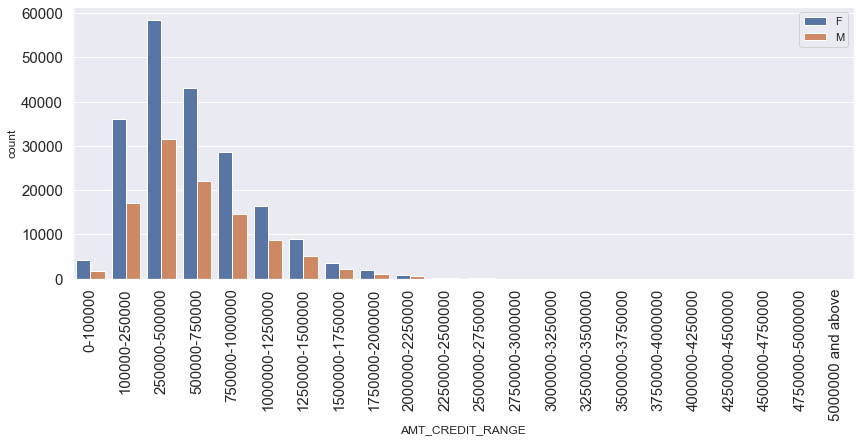

In [48]:
plt.figure(figsize=(14,5))
sns.set_theme(style="darkgrid")
sns.countplot(data=application_data,x="AMT_CREDIT_RANGE",hue="CODE_GENDER")
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="upper right");

``Inferences`` : 
- __Its highly seems that credit loan range between 2.5-5 lakh have more numbers of females as compare to other ranges__
- __the count of males are half as compare to females in every ranges__
- __Females spend more then males__

    Checking for the outliers

In [49]:
application_data.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,Year_birth,Year_Employed,Year_Regustration,Year_ID_Publish,EXT_SOURCE_2,EXT_SOURCE_3
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,43.936973,185.547239,13.660604,8.203294,5.143927e-01,0.510853
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.956133,382.037676,9.651743,4.135481,1.910602e-01,0.194844
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.517808,0.000000,0.000000,0.000000,8.173617e-08,0.000527
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.008219,2.556164,5.506849,4.712329,3.924574e-01,0.370650
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.150685,6.079452,12.339726,8.915068,5.659614e-01,0.535276
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.923288,15.635616,20.491781,11.778082,6.636171e-01,0.669057
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.120548,1000.665753,67.594521,19.717808,8.549997e-01,0.896010


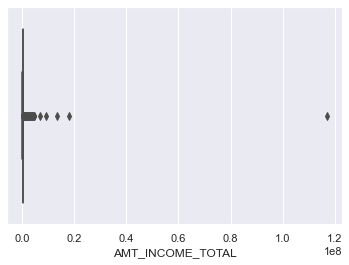

In [50]:
sns.boxplot(application_data["AMT_INCOME_TOTAL"]);

__Its seems like one value in "AMT_INCOME_TOTAL" is very high as compared to other__
- ``Hence it is an outlier``

In [51]:
# this output shows that this is an outlier because her target is 1 and occupation is labourer
application_data[application_data["AMT_INCOME_TOTAL"] ==application_data["AMT_INCOME_TOTAL"].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5000000 and above,500000-750000


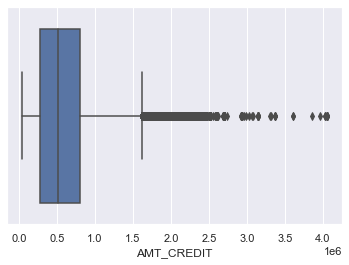

In [52]:
'''
    It seems that there are some outliers in the AMT_CREDIT
    and will check thees values to confirm that
'''
sns.boxplot(application_data["AMT_CREDIT"]);

In [53]:
'''
It seems that "AMT_CREDIT" always greater that "AMT_INCOME_TOTAL" for every values
It means that these are the peoples who took loan more than his/her income
'''
a=application_data[application_data["AMT_CREDIT"]>3.0*1e6]
a[["AMT_CREDIT","AMT_INCOME_TOTAL"]]

,AMT_CREDIT,AMT_INCOME_TOTAL
14643,3956274.0,749331.0
14852,4050000.0,760846.5
17948,4050000.0,783000.0
32099,3150000.0,337500.0
53936,3600000.0,900450.0
87956,3020760.0,229500.0
95571,4031032.5,430650.0
98646,3150000.0,405000.0
104577,3600000.0,468000.0
110459,4050000.0,864900.0


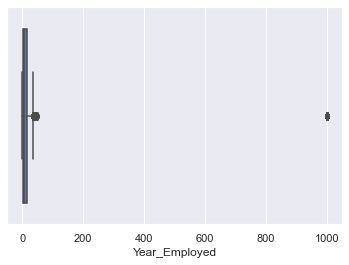

In [54]:
# this variable indicates that how many year before the application the client start
# current employement
# and we found an outlier that is "1000 years"
# which is not possible and this is an outlier
sns.boxplot(application_data["Year_Employed"]);

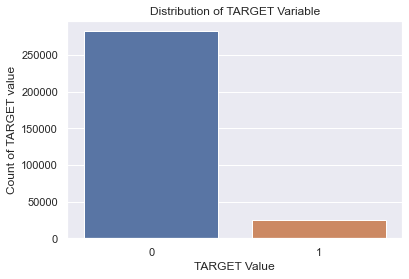

In [55]:
#checking the distribution of target variable
sns.countplot(application_data['TARGET'])
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET value")
plt.title("Distribution of TARGET Variable")
plt.show()

In [56]:
application_data["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Lets do one thing that categories throung the target col

In [57]:
# Creating dataset for Target value with 0
application_data_target_0= application_data[application_data["TARGET"]==0]
application_data_target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0-100000,250000-500000


In [58]:
application_data_target_0.shape

(282686, 44)

In [59]:
#creating dataset for target 1
application_data_target_1=application_data[application_data["TARGET"]==1]
application_data_target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,100000-250000,750000-1000000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,100000-250000,1000000-1250000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100000-250000,250000-500000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,250000-500000


In [60]:
application_data_target_1.shape

(24825, 44)

In [61]:
# let get the ratio of these two dataset
ratio = application_data_target_0.shape[0]/application_data_target_1.shape[0]
ratio

11.387150050352467

- _The ratio of 0 __:__ 1 is 11.3871 __:__ 1_
- _That means for every target = 1 there is 11(approx) target = 0_

   # So that is  highly imbalanced 

__Now we will checking the correlation between the target 0 and target 1 dataset__

<AxesSubplot:>

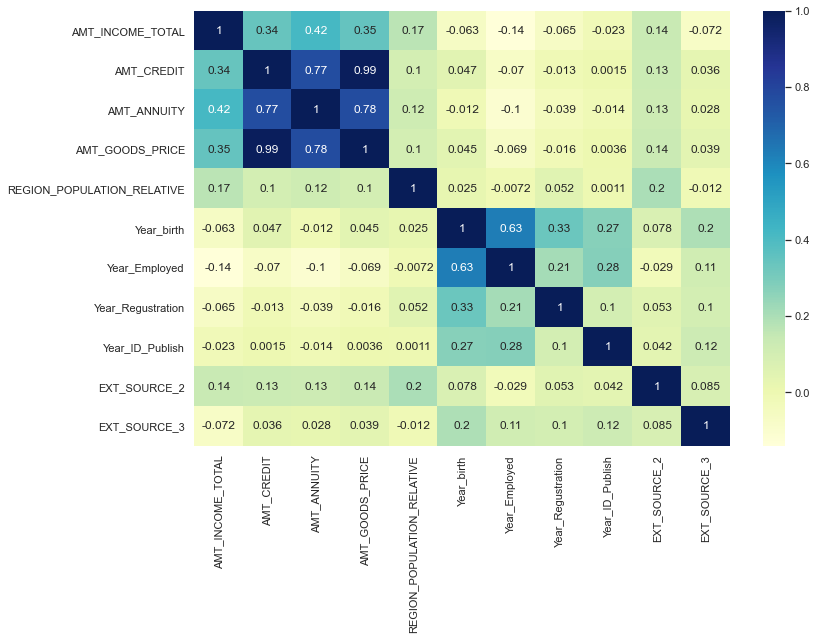

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(application_data_target_0.corr(),annot=True,cmap="YlGnBu")

# Univariate analysis​


__For numerical col__

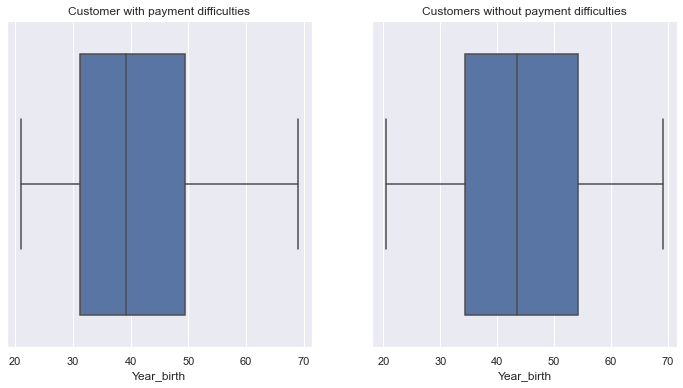

In [67]:
plt.figure(figsize=(12,6))

# for target 1
plt.subplot(1,2,1)
sns.boxplot(application_data_target_1["Year_birth"])
plt.title("Customer with payment difficulties")

plt.subplot(1,2,2)
sns.boxplot(application_data_target_0["Year_birth"])
plt.title("Customers without payment difficulties")

plt.show()

- Customers __with__ Payment_difficulties lies in year __31 to 50__ years.
- Customers __without__ Payment difficulties lies in year __34 to 54__ years.

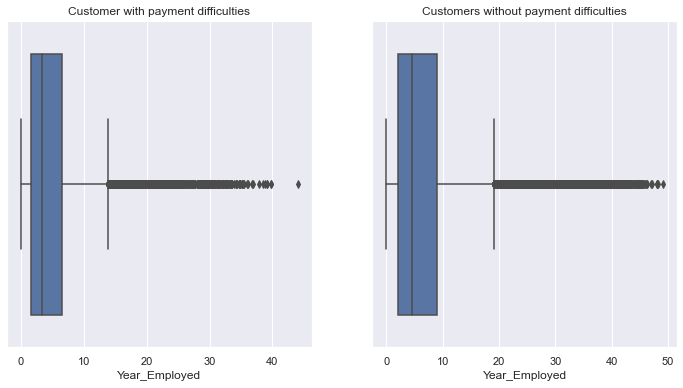

In [71]:
plt.figure(figsize=(12,6))

# for target 1
plt.subplot(1,2,1)
sns.boxplot(application_data_target_1[application_data_target_1["Year_Employed"]<1000]["Year_Employed"])
plt.title("Customer with payment difficulties")

# for target 0
plt.subplot(1,2,2)
sns.boxplot(application_data_target_0[application_data_target_0["Year_Employed"]<1000]["Year_Employed"])
plt.title("Customers without payment difficulties")

plt.show()

- __Customers with payment difficulties lies in year 2 to 6.__
- __Customers without payment difficulties lies in year 2 to 9.__

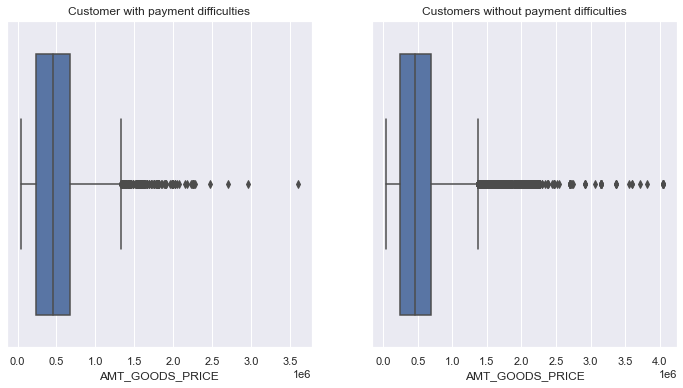

In [72]:
plt.figure(figsize=(12,6))

# for target 1
plt.subplot(1,2,1)
sns.boxplot(application_data_target_1["AMT_GOODS_PRICE"])
plt.title("Customer with payment difficulties")

plt.subplot(1,2,2)
sns.boxplot(application_data_target_0["AMT_GOODS_PRICE"])
plt.title("Customers without payment difficulties")

plt.show()

- Here we can see that the customer without payment difficulties lies in between 0.3 to 0.7
- the customer with payment difficulties lies in between the same as of the without payment 0.3 to 0.7.
- And also both are having   the mid value about 0.5.

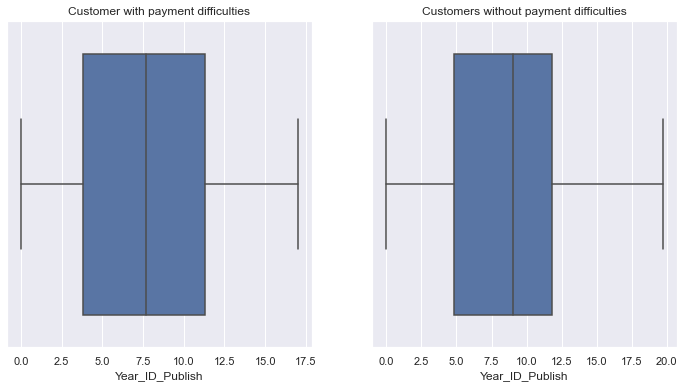

In [74]:
plt.figure(figsize=(12,6))

# for target 1
plt.subplot(1,2,1)
sns.boxplot(application_data_target_1["Year_ID_Publish"])
plt.title("Customer with payment difficulties")

plt.subplot(1,2,2)
sns.boxplot(application_data_target_0["Year_ID_Publish"])
plt.title("Customers without payment difficulties")

plt.show()

- Here we can see that the customer witht payment difficulties year lies in between 3.75 to 11.75
- the customer with payment difficulties year lies in between 5.0 to 11.75

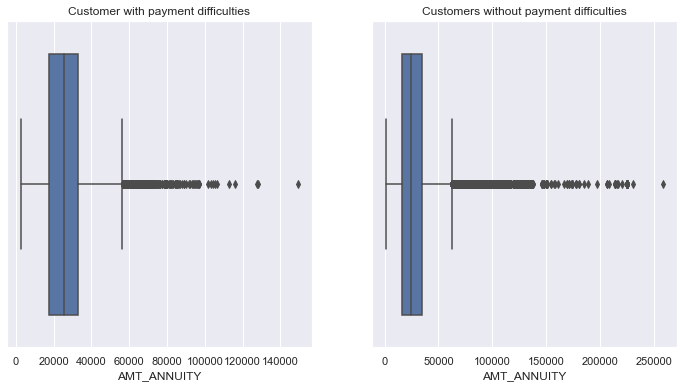

In [78]:
plt.figure(figsize=(12,6))

# for target 1
plt.subplot(1,2,1)
sns.boxplot(application_data_target_1["AMT_ANNUITY"])
plt.title("Customer with payment difficulties")

plt.subplot(1,2,2)
sns.boxplot(application_data_target_0["AMT_ANNUITY"])
plt.title("Customers without payment difficulties")

plt.show()


In [79]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

# For categorical values

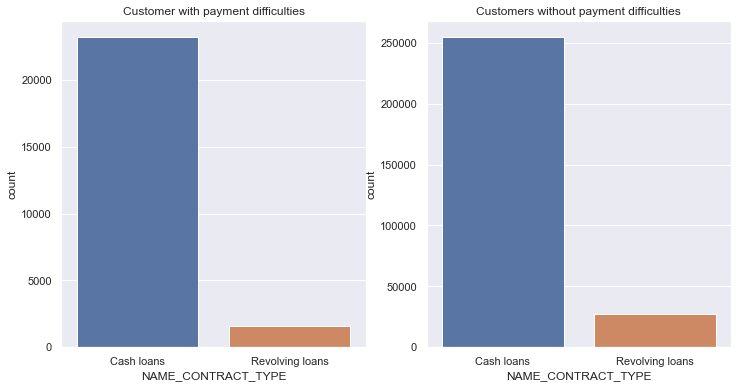

In [81]:
plt.figure(figsize=(12,6))

# for target 1
plt.subplot(1,2,1)
sns.countplot(application_data_target_1["NAME_CONTRACT_TYPE"])
plt.title("Customer with payment difficulties")

plt.subplot(1,2,2)
sns.countplot(application_data_target_0["NAME_CONTRACT_TYPE"])
plt.title("Customers without payment difficulties")

plt.show()

    Here we noticed that the customers with or without payment difficulties both are getting cash loans

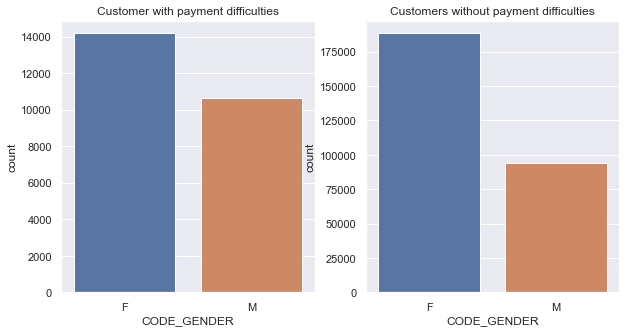

In [85]:
plt.figure(figsize=(10,5))

# for target 1
plt.subplot(1,2,1)
sns.countplot(application_data_target_1["CODE_GENDER"])
plt.title("Customer with payment difficulties")

plt.subplot(1,2,2)
sns.countplot(application_data_target_0["CODE_GENDER"])
plt.title("Customers without payment difficulties")

plt.show()

    Here in both the cases the Female count is highest 

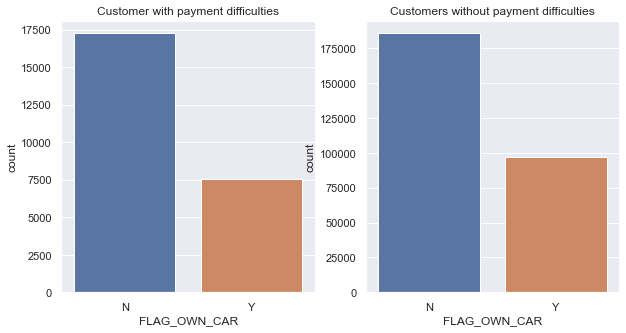

In [87]:
plt.figure(figsize=(10,5))

# for target 1
plt.subplot(1,2,1)
sns.countplot(application_data_target_1["FLAG_OWN_CAR"])
plt.title("Customer with payment difficulties")

plt.subplot(1,2,2)
sns.countplot(application_data_target_0["FLAG_OWN_CAR"])
plt.title("Customers without payment difficulties")

plt.show()

__IN both the cases there are less number of people who have their own car__

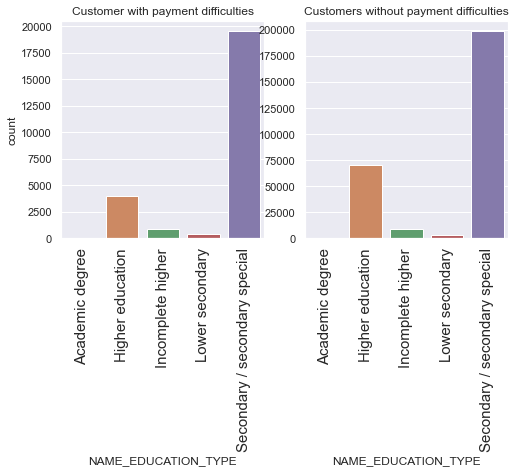

In [99]:
plt.figure(figsize=(8,4))

# for target 1
plt.subplot(1,2,1)
sns.countplot(application_data_target_1["NAME_EDUCATION_TYPE"])
plt.title("Customer with payment difficulties")
plt.xticks(rotation=90,fontsize=15)

plt.subplot(1,2,2)
sns.countplot(application_data_target_0["NAME_EDUCATION_TYPE"])
plt.title("Customers without payment difficulties")
plt.xticks(rotation=90,fontsize=15)
plt.ylabel(None)
plt.show()

In both the cases ``Secondary/Secondary Special`` degree are highest as compare to others

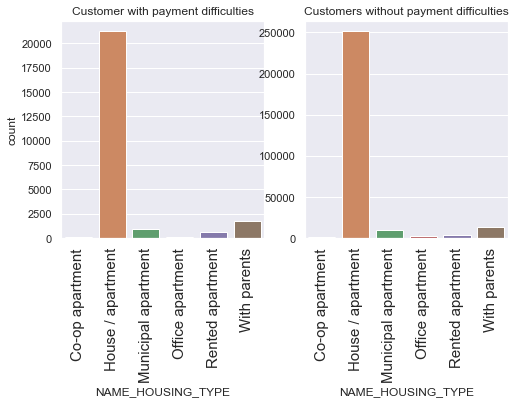

In [100]:
plt.figure(figsize=(8,4))

# for target 1
plt.subplot(1,2,1)
sns.countplot(application_data_target_1["NAME_HOUSING_TYPE"])
plt.title("Customer with payment difficulties")
plt.xticks(rotation=90,fontsize=15)

plt.subplot(1,2,2)
sns.countplot(application_data_target_0["NAME_HOUSING_TYPE"])
plt.title("Customers without payment difficulties")
plt.xticks(rotation=90,fontsize=15)
plt.ylabel(None)
plt.show()

- Customers in both the cases have the highest in ``House/apartment``. 
- We can say that people take the lone more for  ``House/apartment``.

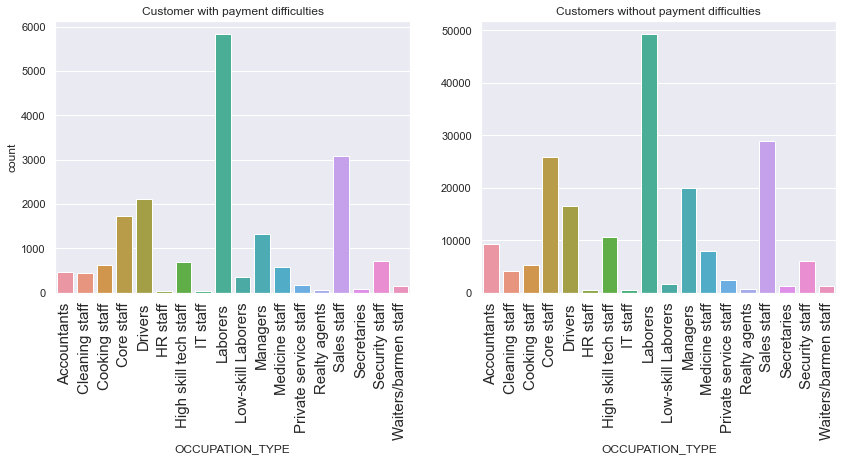

In [105]:
plt.figure(figsize=(14,5))

# for target 1
plt.subplot(1,2,1)
sns.countplot(application_data_target_1["OCCUPATION_TYPE"])
plt.title("Customer with payment difficulties")
plt.xticks(rotation=90,fontsize=15)

plt.subplot(1,2,2)
sns.countplot(application_data_target_0["OCCUPATION_TYPE"])
plt.title("Customers without payment difficulties")
plt.xticks(rotation=90,fontsize=15)
plt.ylabel(None)
plt.show()

- Here we can say that Customers with occupation  as``Laborers`` getting more difficulties to repaying the loan and on other most occupation is where they facing diffiultis is ``Core staff`` and ``Sakes staff``
- But also on the other hand with non-defaulter the same occupation have no impact on repaying the lone.

# Bivariate Analysis.
- Numerical-Numerical

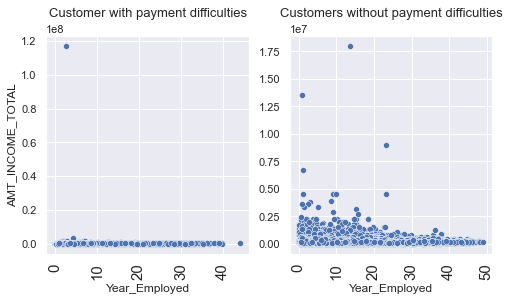

In [114]:
plt.figure(figsize=(8,4))

# for target 1
plt.subplot(1,2,1)
sns.scatterplot(data=application_data_target_1[application_data_target_1["Year_Employed"]<1000],x="Year_Employed",y="AMT_INCOME_TOTAL")
plt.title("Customer with payment difficulties\n",fontsize=13)
plt.xticks(rotation=90,fontsize=15)

# fOR TARGET 0
plt.subplot(1,2,2)
sns.scatterplot(data=application_data_target_0[application_data_target_0["Year_Employed"]<1000],x="Year_Employed",y="AMT_INCOME_TOTAL")
plt.title("Customers without payment difficulties\n",fontsize=13)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel(None)
plt.show()

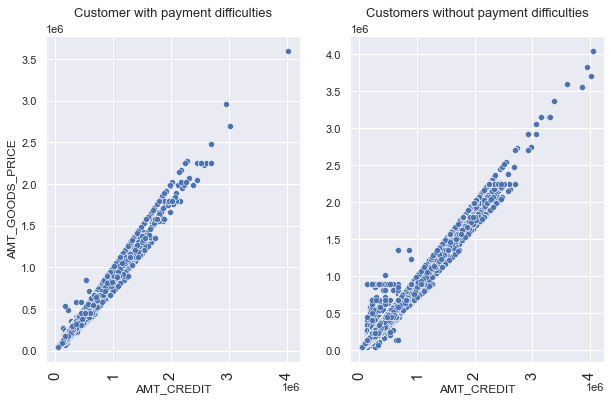

In [117]:
plt.figure(figsize=(10,6))

# for target 1
plt.subplot(1,2,1)
sns.scatterplot(data=application_data_target_1,x="AMT_CREDIT",y="AMT_GOODS_PRICE")
plt.title("Customer with payment difficulties\n",fontsize=13)
plt.xticks(rotation=90,fontsize=15)

# fOR TARGET 0
plt.subplot(1,2,2)
sns.scatterplot(data=application_data_target_0,x="AMT_CREDIT",y="AMT_GOODS_PRICE")
plt.title("Customers without payment difficulties\n",fontsize=13)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel(None)
plt.show()

__AMT_GOODS_PRICE__ and __AMT_CREDIT__ are positively correlated

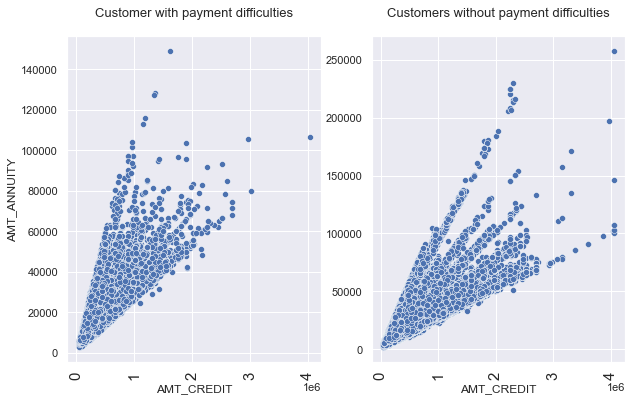

In [118]:
plt.figure(figsize=(10,6))

# for target 1
plt.subplot(1,2,1)
sns.scatterplot(data=application_data_target_1,x="AMT_CREDIT",y="AMT_ANNUITY")
plt.title("Customer with payment difficulties\n",fontsize=13)
plt.xticks(rotation=90,fontsize=15)

# fOR TARGET 0
plt.subplot(1,2,2)
sns.scatterplot(data=application_data_target_0,x="AMT_CREDIT",y="AMT_ANNUITY")
plt.title("Customers without payment difficulties\n",fontsize=13)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel(None)
plt.show()

People without payment difficuties take more credit for the annuity that they have

# categorical-categorical bivariate analysis"

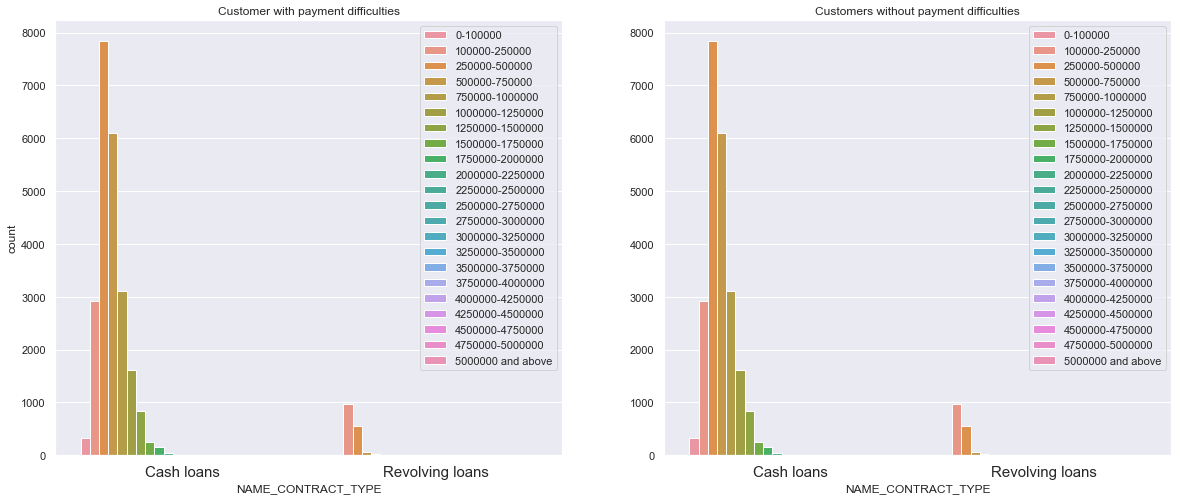

In [124]:
plt.figure(figsize=(20,8))

# for target 1
plt.subplot(1,2,1)
sns.countplot(data = application_data_target_1,x="NAME_CONTRACT_TYPE",hue="AMT_CREDIT_RANGE")
plt.title("Customer with payment difficulties")
plt.xticks(fontsize=15)
plt.legend(loc="upper right")

plt.subplot(1,2,2)
sns.countplot(data = application_data_target_1,x="NAME_CONTRACT_TYPE",hue="AMT_CREDIT_RANGE")
plt.title("Customers without payment difficulties")
plt.xticks(fontsize=15)
plt.ylabel(None)
plt.legend(loc="upper right")
plt.show()

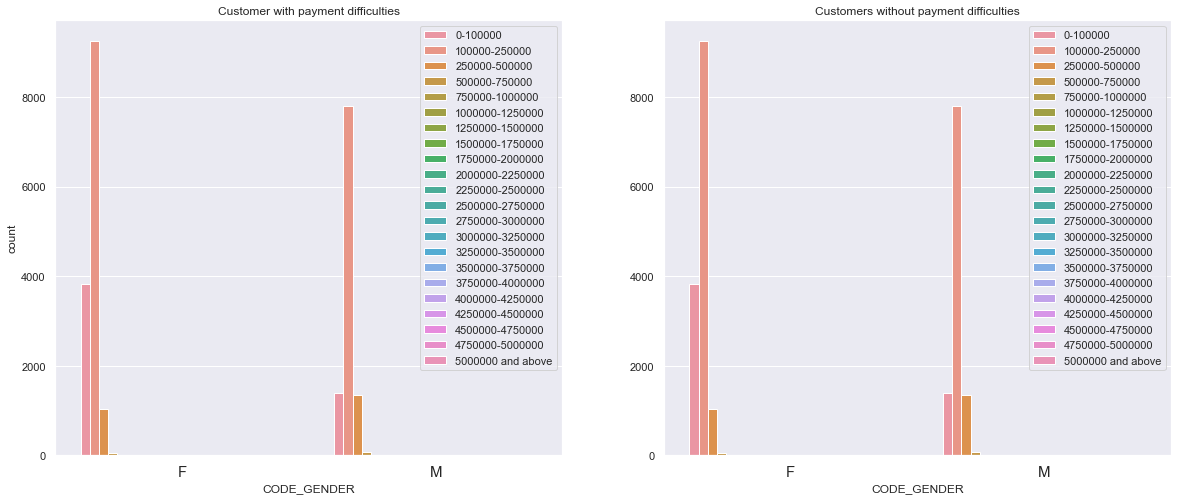

In [126]:
plt.figure(figsize=(20,8))

# for target 1
plt.subplot(1,2,1)
sns.countplot(data = application_data_target_1,x="CODE_GENDER",hue="AMT_INCOME_RANGE")
plt.title("Customer with payment difficulties")
plt.xticks(fontsize=15)
plt.legend(loc="upper right")

plt.subplot(1,2,2)
sns.countplot(data = application_data_target_1,x="CODE_GENDER",hue="AMT_INCOME_RANGE")
plt.title("Customers without payment difficulties")
plt.xticks(fontsize=15)
plt.ylabel(None)
plt.legend(loc="upper right")
plt.show()

# Numerical-Categorical analysis

No handles with labels found to put in legend.


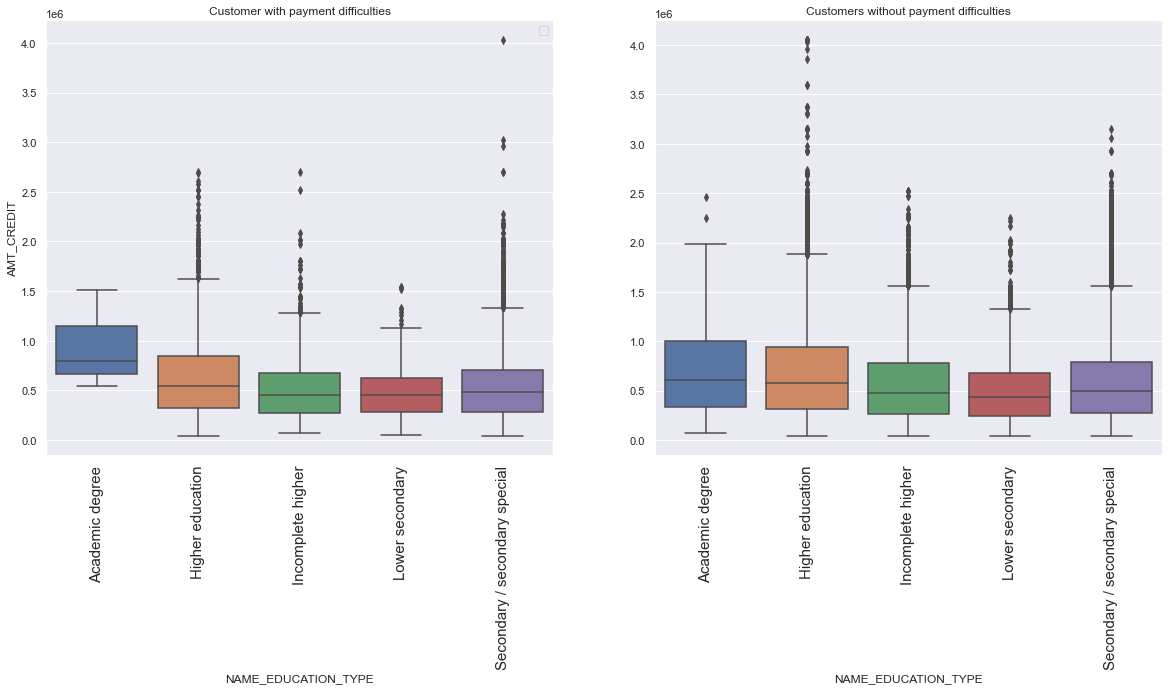

In [130]:
plt.figure(figsize=(20,8))

# for target 1
plt.subplot(1,2,1)
sns.boxplot(data = application_data_target_1,y="AMT_CREDIT",x="NAME_EDUCATION_TYPE")
plt.title("Customer with payment difficulties")
plt.xticks(rotation=90,fontsize=15)
plt.legend(loc="upper right")

plt.subplot(1,2,2)
sns.boxplot(data = application_data_target_0,y="AMT_CREDIT",x="NAME_EDUCATION_TYPE")
plt.title("Customers without payment difficulties")
plt.xticks(rotation=90,fontsize=15)
plt.ylabel(None)
# plt.legend(loc="upper right")
plt.show()

Here we can see that the range of customers without payment of ``Academic degree`` is higher than the customer of with payment. And the rest of the Education type is almost same for both the cases.

No handles with labels found to put in legend.


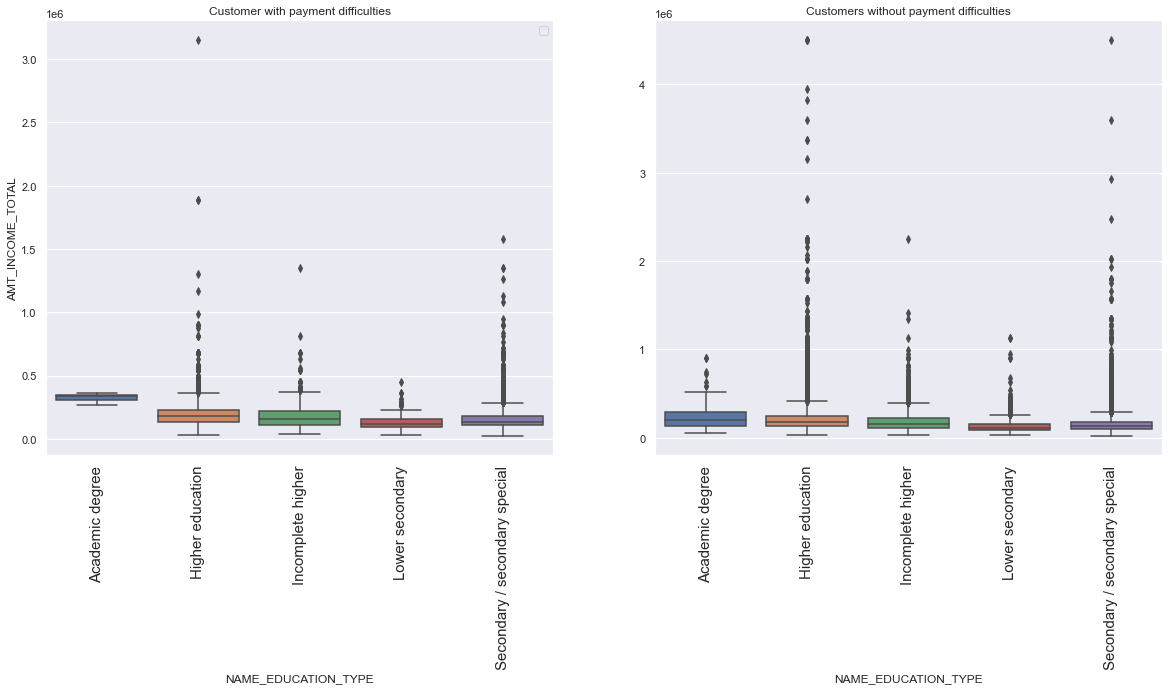

In [131]:
plt.figure(figsize=(20,8))

# for target 1
plt.subplot(1,2,1)
sns.boxplot(data = application_data_target_1[application_data_target_1["AMT_INCOME_TOTAL"]<5000000],
            y="AMT_INCOME_TOTAL",x="NAME_EDUCATION_TYPE")
plt.title("Customer with payment difficulties")
plt.xticks(rotation=90,fontsize=15)
plt.legend(loc="upper right")

plt.subplot(1,2,2)
sns.boxplot(data = application_data_target_0[application_data_target_0["AMT_INCOME_TOTAL"]<5000000],
            y="AMT_INCOME_TOTAL",x="NAME_EDUCATION_TYPE")
plt.title("Customers without payment difficulties")
plt.xticks(rotation=90,fontsize=15)
plt.ylabel(None)
# plt.legend(loc="upper right")
plt.show()

Here we see that the customers without payment difficulties have more outliers than customers with payment difficulties

No handles with labels found to put in legend.


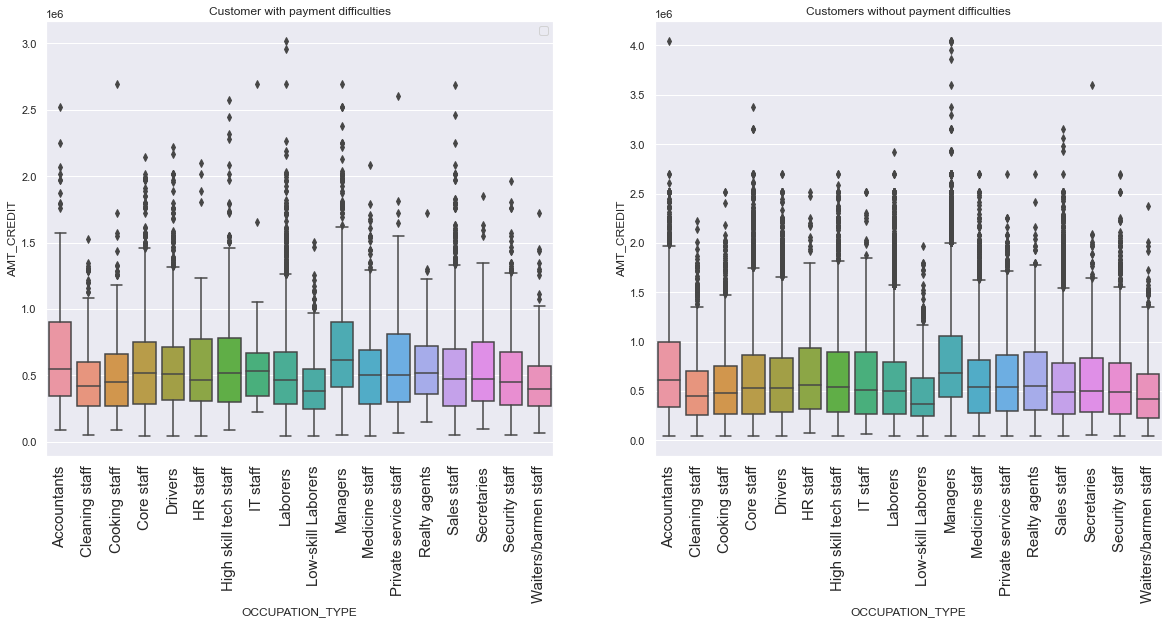

In [134]:
plt.figure(figsize=(20,8))

# for target 1
plt.subplot(1,2,1)
sns.boxplot(data = application_data_target_1,y="AMT_CREDIT",x="OCCUPATION_TYPE")
plt.title("Customer with payment difficulties")
plt.xticks(rotation=90,fontsize=15)
plt.legend(loc="upper right")

plt.subplot(1,2,2)
sns.boxplot(data = application_data_target_0,y="AMT_CREDIT",x="OCCUPATION_TYPE")
plt.title("Customers without payment difficulties")
plt.xticks(rotation=90,fontsize=15)
# plt.ylabel(None)
# plt.legend(loc="upper right")
plt.show()

Here we can see that the range of the customers without payment more as compare to the customers with payment.

# Merging application dataset and previous dataset

In [135]:
previous_data=pd.read_csv("previous_application.csv")
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
previous_data.shape

(1670214, 37)

In [137]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [138]:
previous_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [143]:
application_data_1=pd.read_csv("application_data.csv")


In [144]:
#cheching the shape of the application data
application_data_1.shape

(307511, 122)

In [145]:
#checking shape of the previous data
previous_data.shape

(1670214, 37)

In [147]:
#merging these two dataset
New_combine_data=pd.merge(left=application_data_1,right=previous_data,how="inner",on="SK_ID_CURR",suffixes="_x")



In [148]:
# checking the shape the of new data frame
New_combine_data.shape

(1413701, 158)

In [149]:
New_combine_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [151]:
# Now we will cehck each type of contract status
New_combine_data["NAME_CONTRACT_STATUS"].value_counts(normalize=True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

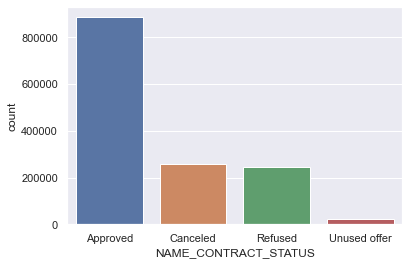

In [153]:
# lets plot this above outcomes
sns.countplot(data=New_combine_data,x="NAME_CONTRACT_STATUS")


# Dividing the data set into four parts
- __Approved__
- __Cancelled__
- __Refused__
- __Unused offer__

In [155]:
approved = New_combine_data[New_combine_data["NAME_CONTRACT_STATUS"] == "Approved"]
cancalled = New_combine_data[New_combine_data["NAME_CONTRACT_STATUS"] == "Canceled"]
refused = New_combine_data[New_combine_data["NAME_CONTRACT_STATUS"] == "Refused"]
unused_offer = New_combine_data[New_combine_data["NAME_CONTRACT_STATUS"] == "Unused offer"]


Now that we know the different status of the loan. we will now examine the variables based on this, so as to get an idea of which varibale is doing what.

In [156]:
New_combine_data["NAME_CONTRACT_TYPEx"].value_counts()

Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: NAME_CONTRACT_TYPEx, dtype: int64

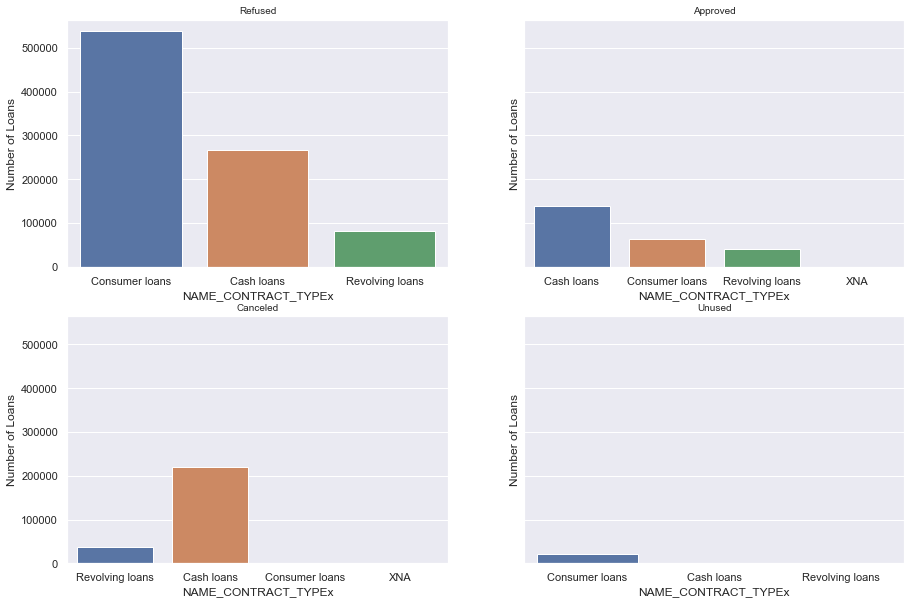

In [159]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,10),sharey=True)

ax1 = sns.countplot(ax=ax1,data=approved,x='NAME_CONTRACT_TYPEx')
ax1.set_title("Refused", fontsize=10)
ax1.set_xlabel('NAME_CONTRACT_TYPEx')
ax1.set_ylabel("Number of Loans")
# ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2 = sns.countplot(ax=ax2,data=refused,x='NAME_CONTRACT_TYPEx')
ax2.set_title("Approved", fontsize=10)
ax2.set_xlabel('NAME_CONTRACT_TYPEx')
ax2.set_ylabel("Number of Loans")
# ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

ax3 = sns.countplot(ax=ax3,data=cancalled,x='NAME_CONTRACT_TYPEx')
ax3.set_title("Canceled", fontsize=10)
ax3.set_xlabel('NAME_CONTRACT_TYPEx')
ax3.set_ylabel("Number of Loans")
# ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

ax4 = sns.countplot(ax=ax4,data=unused_offer,x='NAME_CONTRACT_TYPEx')
ax4.set_title("Unused", fontsize=10)
ax4.set_xlabel('NAME_CONTRACT_TYPEx')
ax4.set_ylabel("Number of Loans")
# ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
plt.show()


Here we can see that the Revolving loan is much more acceptable as compare to the cash and consumer loans.

as we can see that to visualize 4 plots we wrote same code multiple times. so to avoid redundancy, and to save our time, we will put the above code in a function and generalize it for our following plots, so that its easy to visualize and saves time

In [162]:
def plot_multi(variable_name):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,12), sharey='all')
    fig.tight_layout(pad=10.0)

    ax1 = sns.countplot(ax=ax1,data=approved,x=variable_name)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_ylabel("Number of Loans")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

    ax2 = sns.countplot(ax=ax2,data=refused,x=variable_name)
    ax2.set_title("Approved", fontsize=10)
    ax2.set_ylabel("Number of Loans")
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

    ax3 = sns.countplot(ax=ax3,data=cancalled,x=variable_name)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel(variable_name)
    ax3.set_ylabel("Number of Loans")
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

    ax4 = sns.countplot(ax=ax4,data=unused_offer,x=variable_name)
    ax4.set_title("Unused", fontsize=10)
    ax4.set_xlabel(variable_name)
    ax4.set_ylabel("Number of Loans")
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
    
    plt.show()


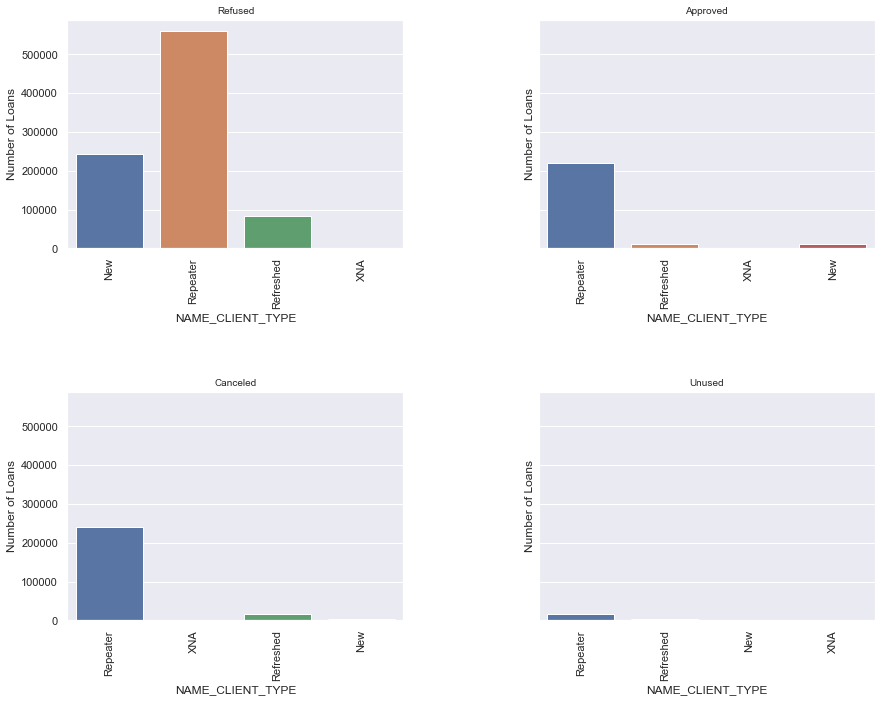

In [163]:
plot_multi("NAME_CLIENT_TYPE")

- Here we can see that Repeater are getting more refussion
- Also Repeaters are getting approval also.


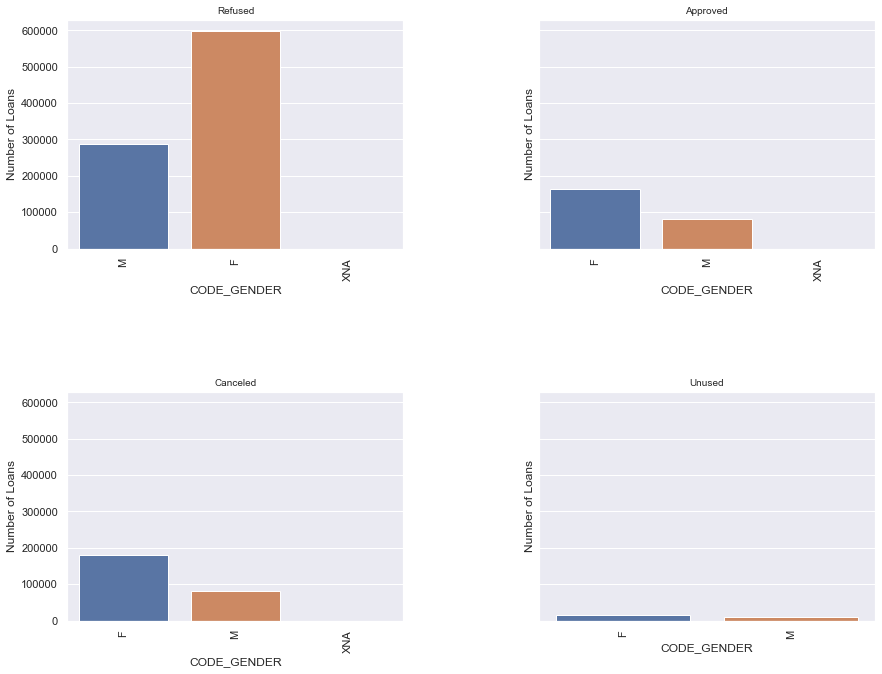

In [164]:
plot_multi("CODE_GENDER")

- Here we see that ``female`` are getting more refussion, more approved, more cancelled as compare to `` Male``

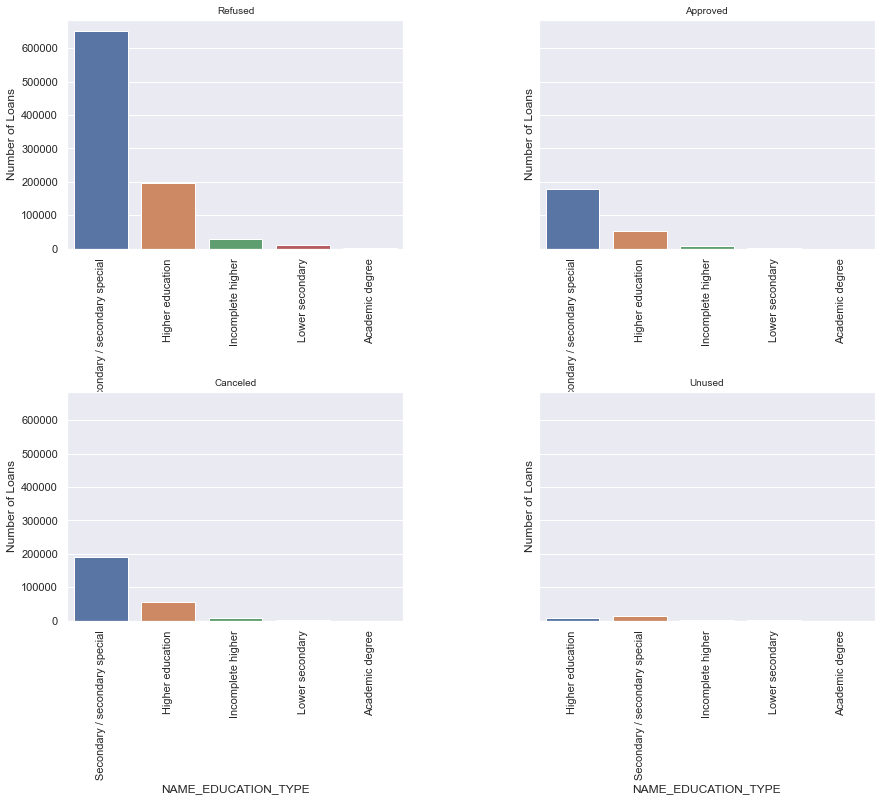

In [167]:
plot_multi("NAME_EDUCATION_TYPE")


- Here we see that ``Secondary/seecndary special`` has more refused. more approved, more cancelled

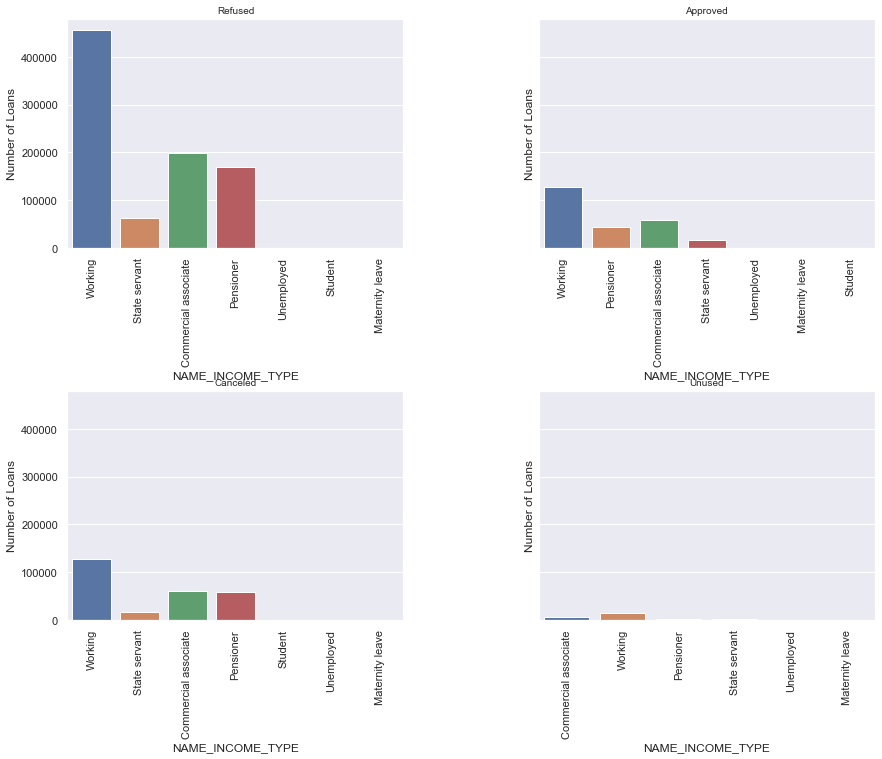

In [169]:
plot_multi("NAME_INCOME_TYPE")

- HERE we saw that ``working`` and ``Commercial associate`` are getting more loans 
- And also they ``working``  and `` Commercial associate `` are getting refusion and aprroves

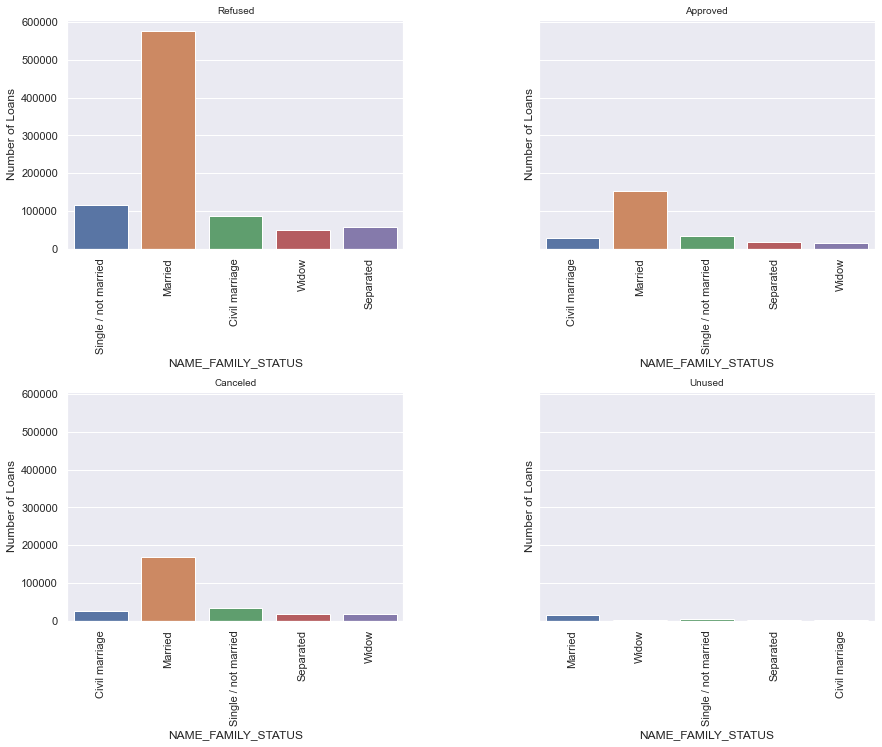

In [171]:
plot_multi("NAME_FAMILY_STATUS")

- Married people are taking more loans.
- And also getting more refussion ans approval and cancelled.

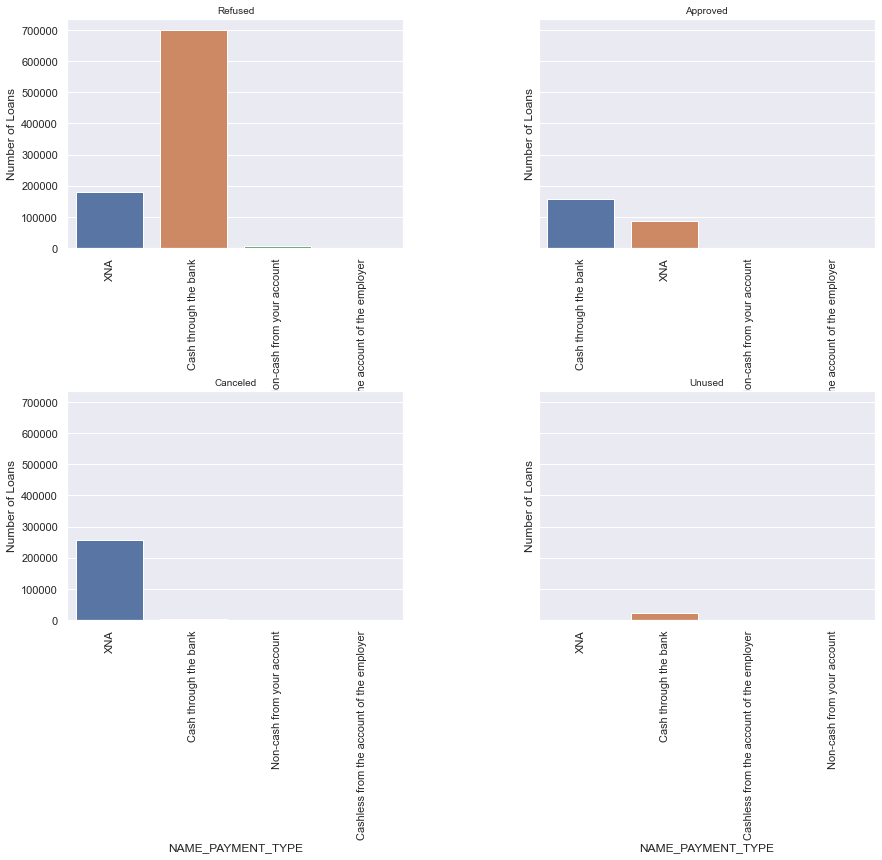

In [172]:
plot_multi("NAME_PAYMENT_TYPE")

here we can see that more number of refusion given by the people who have ``cash through the bank`` as the payment type  

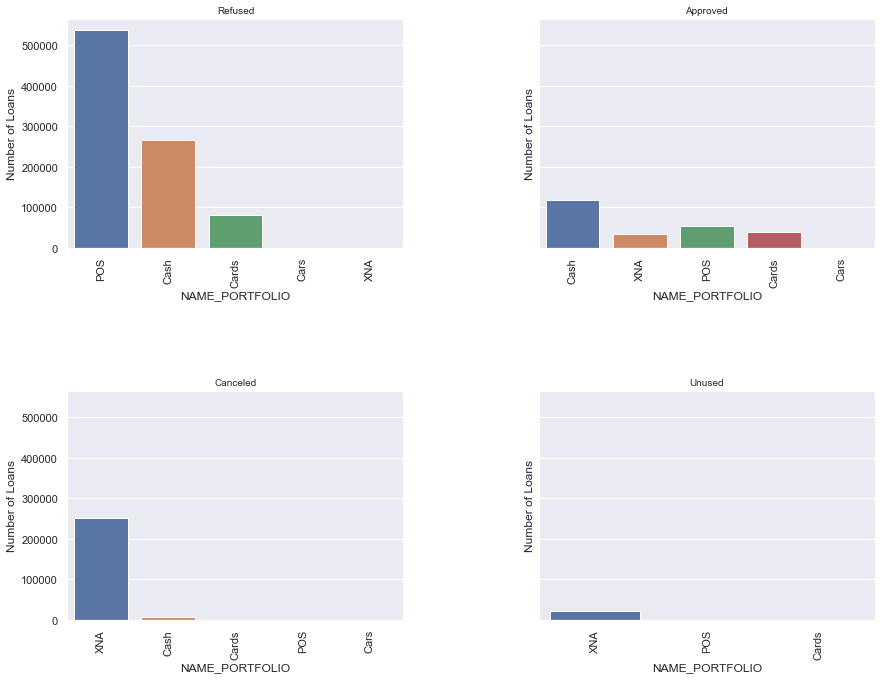

In [175]:
plot_multi("NAME_PORTFOLIO")

- Most approved loans are in cash
- Most refused loan are in POS

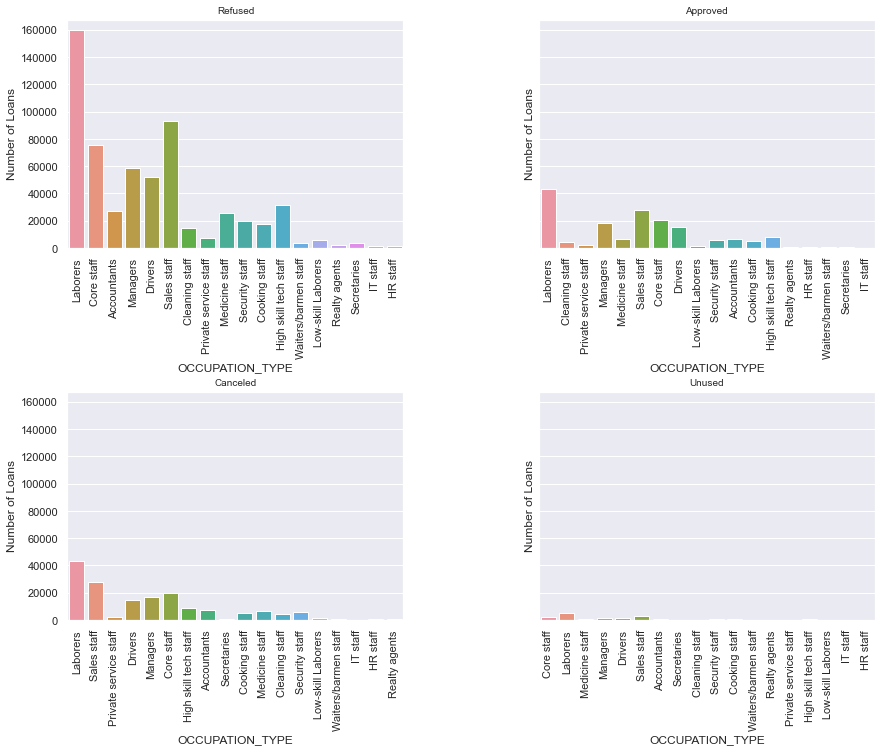

In [176]:
plot_multi("OCCUPATION_TYPE")

- More loans are taken by "labour", "core staff","Sales staff","Mangers".
- And also for those occupation type did get refusion in getting loan
- Labours type occupation may have large number of approvals

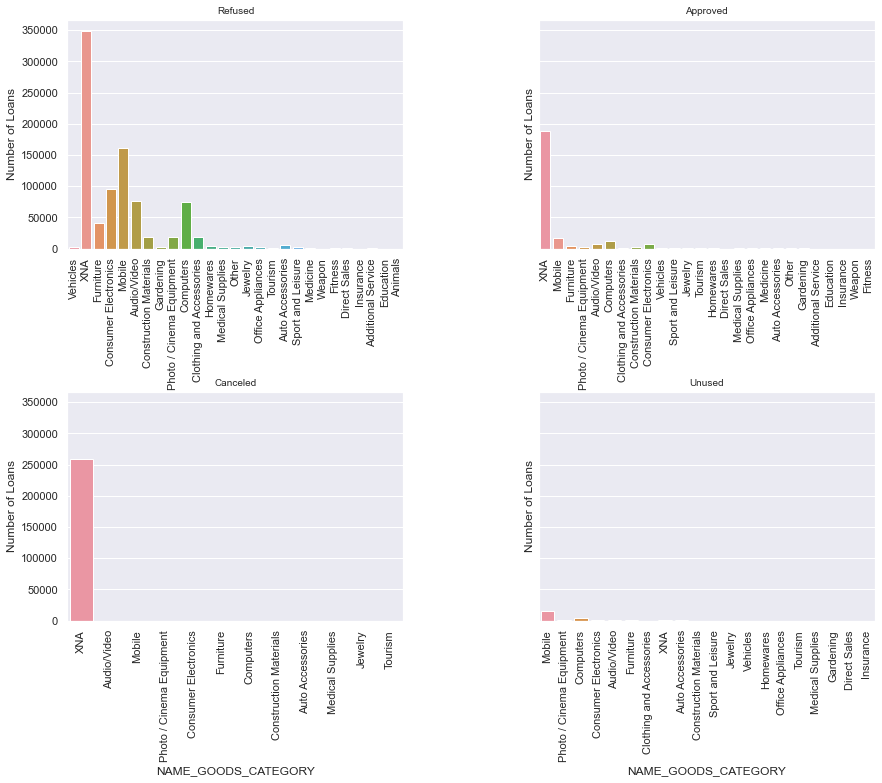

In [177]:
plot_multi("NAME_GOODS_CATEGORY")

- Most refused loans for the "Mobile" and also highest approved.

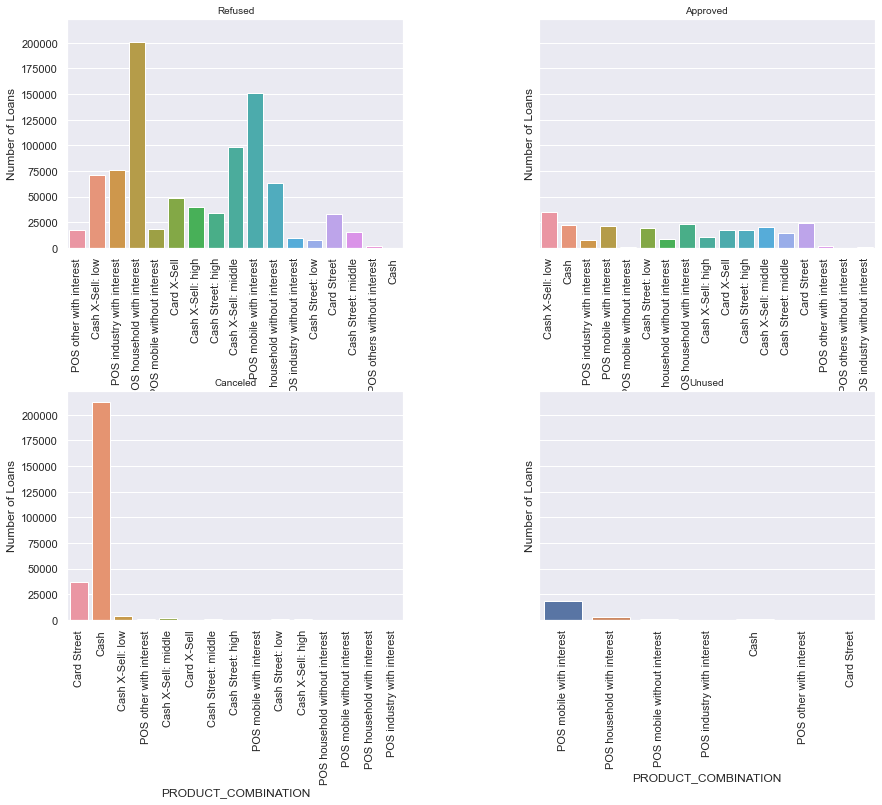

In [178]:
plot_multi("PRODUCT_COMBINATION")

The most accepting loan is Cash X-sell: low And most canceled loan is Cash and Most Unused loan is POS mobile with interest.


-